In [1]:
from NetClasses import *
from SobolevClasses import *

2024-05-30 12:14:20.808117: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Create a Classical Sobolev Space of r = 2, p = 2

domain = [(0, 2*sp.pi), (0, 2*sp.pi)]
ClassicSobolevSpace = SobolevSpace(domain, r=2, p=2)

x, y = sp.symbols('x y')
variables = [x, y]
f = sp.sin(x) * sp.cos(y)

# Find the Sobolev Norm of f
ClassicalNorm = ClassicSobolevSpace.norm(f, variables)
print(f"The Sobolev Norm of {f} of order {ClassicSobolevSpace.r} and degree {ClassicSobolevSpace.p} is {float(ClassicalNorm)}")

The Sobolev Norm of sin(x)*cos(y) of order 2 and degree 2 is 7.695298980971184


In [3]:
# Create a Discritized Sobolev Space of r = 2, p = 2

domain = [(0, 2*np.pi), (0, 2*np.pi)]
grid_resolution = [10, 10]
DSobolevSpace = DiscreteSobolevSpace(domain, grid_res = grid_resolution, r=2, p=2)

# Find the Sobolev Norm of f
def f(x, y):
    return np.sin(x) * np.cos(y)

DiscreteNorm = DSobolevSpace.norm(f)
print(f"The Sobolev Norm of order {DSobolevSpace.r} and degree {DSobolevSpace.p} with grid resolution {grid_resolution} is {DiscreteNorm}")

The Sobolev Norm of order 2 and degree 2 with grid resolution [10, 10] is 7.76522377648773


In [4]:
# Convergence of Discete Sobolev Norm
domain = [(0, 2*np.pi), (0, 2*np.pi)]

grid_resolutions = np.arange(10, 5001, 50)

norms = []
for res in tqdm(grid_resolutions):
    space = DiscreteSobolevSpace(domain, r=2, p=2, grid_res=[res, res])
    norms.append(space.norm(f))

100%|██████████| 100/100 [47:22<00:00, 28.42s/it] 


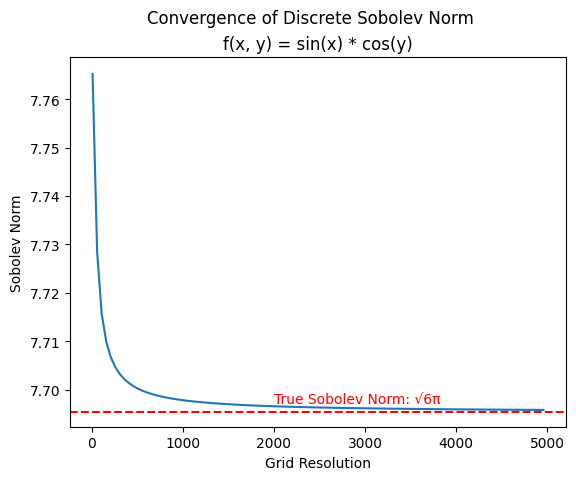

In [15]:
plt.plot(grid_resolutions, norms)
plt.xlabel("Grid Resolution")
plt.ylabel("Sobolev Norm")
plt.suptitle("Convergence of Discrete Sobolev Norm")
# Add subtitle
plt.title("f(x, y) = sin(x) * cos(y), r = 2, p = 2")
# Plot line for true Sobolev norm value
plt.axhline(ClassicalNorm, linestyle='--', color='red')
# Add text for true Sobolev norm value
plt.text(2000, ClassicalNorm + 0.002, f"True Sobolev Norm: √6π", color='red')
plt.show()

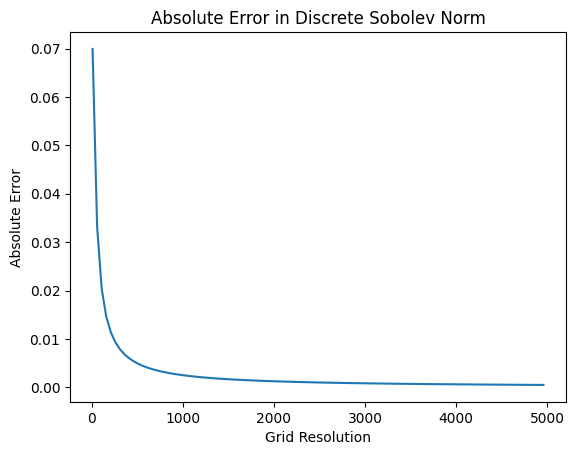

Grid resolution 10 give less than 1% error.
Grid resolution 360 give less than 0.1% error.
Grid resolution 3360 give less than 0.01% error.


In [17]:
# Plot the absolute error in the Sobolev norm
errors = np.abs(np.array(norms) - ClassicalNorm)
plt.plot(grid_resolutions, errors)
plt.xlabel("Grid Resolution")
plt.ylabel("Absolute Error")
plt.title("Absolute Error in Discrete Sobolev Norm")
plt.show()

# Give first indices that give less than 1%, 0.1%, 0.01% error
indices = np.where(errors < ClassicalNorm*0.01)[0][0]
print(f"Grid resolution {grid_resolutions[indices]} give less than 1% error.")
indices = np.where(errors < ClassicalNorm*0.001)[0][0]
print(f"Grid resolution {grid_resolutions[indices]} give less than 0.1% error.")
indices = np.where(errors < ClassicalNorm*0.0001)[0][0]
print(f"Grid resolution {grid_resolutions[indices]} give less than 0.01% error.")